In [11]:
%%capture --no-stderr
%pip install -U langgraph langsmith langchain-openai graphviz

In [12]:
import os
from langchain_openai import ChatOpenAI


os.environ['OPENAI_API_KEY'] = "ur key"
llm = ChatOpenAI(model="gpt-4o")

In [13]:
from typing import TypedDict, Optional

class GraphState(TypedDict):
    question: Optional[str] 
    classification: Optional[str]
    response: Optional[str]

In [14]:
from langgraph.graph import StateGraph
graph = StateGraph(GraphState)

In [15]:
import random


def classify_input_node(state):
    question = state.get('question', '').strip()
    # classification = classify(question)  # Assume a function that classifies the input
    classification = "handle_search" if random.randint(0, 1) == 1 else "greeting"
    return {"classification": classification}
def handle_greeting_node(state):
    return {"response": "Hello! How can I help you today?"}
def handle_search_node(state):
    question = state.get('question', '').strip()
    search_result = f"Search result for '{question}'"
    return {"response": search_result}

In [16]:
graph.add_node("classify_input", classify_input_node)
graph.add_node("handle_greeting", handle_greeting_node)
graph.add_node("handle_search", handle_search_node)

def decide_next_node(state):
    return "handle_greeting" if state.get('classification') == "greeting" else "handle_search"
graph.add_conditional_edges(
    "classify_input",
    decide_next_node,
    {
        "handle_greeting": "handle_greeting",
        "handle_search": "handle_search"
    }
)

In [17]:
from langgraph.constants import END

graph.set_entry_point("classify_input")
graph.add_edge('handle_greeting', END)
graph.add_edge('handle_search', END)
graph = graph.compile()

In [18]:
inputs = {"question": "Hello, how are you?"}
result = graph.invoke(inputs)
print(result)

{'question': 'Hello, how are you?', 'classification': 'handle_search', 'response': "Search result for 'Hello, how are you?'"}


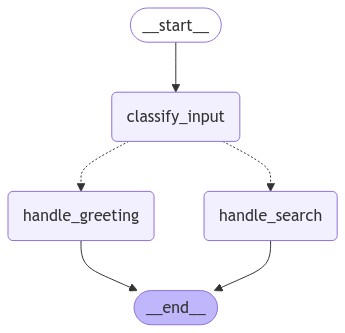

In [19]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass